- In this notebook, each membrane marker is run independently with the DAPI nuclear marker and each FOV is split and run
    separately using the multiplex segmentation algorithm
- Loading the .tif file in Qupath, each seperate image was filtered using grayscale option
- Each image was then exported as a Rendered RBG jpg 
- Each image is then split, prior to computing centroids and intensities
- Make sure to run all cells once only


## Image Preprocessing

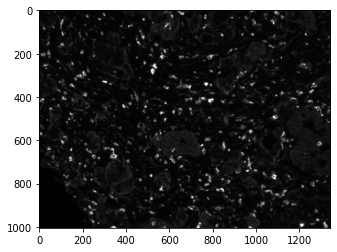

In [22]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image 

#manually read in images (will automate later)
dapi = mpimg.imread("DAPI_1.jpg")
pdl1 = mpimg.imread("PD_L1_1.jpg")
cd8 = mpimg.imread("CD8_1.jpg")
ck = mpimg.imread("CK_1.jpg")
cd68 = mpimg.imread("CD68_1.jpg")
cd3 = mpimg.imread("CD3_1.jpg")


original_length = dapi.shape[0]
original_width = dapi.shape[1]


plt.imshow(cd8)
plt.imshow(pdl1)

(1004, 672, 3)
822


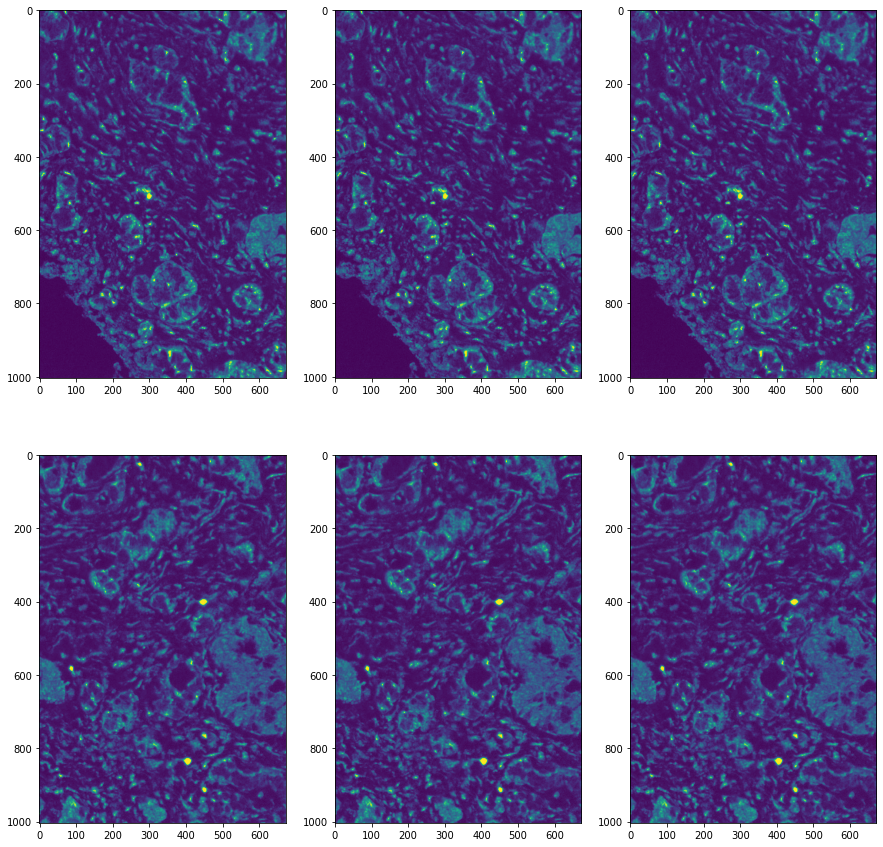

In [3]:
#split images

width_cutoff = original_width // 2
length_cutoff = original_length // 2

dapi_1 = dapi[:, :width_cutoff]
dapi_2 = dapi[:, width_cutoff:]

pdl1_1 = pdl1[:, :width_cutoff]
pdl1_2 = pdl1[:, width_cutoff:]

cd8_1 = cd8[:, :width_cutoff]
cd8_2 = cd8[:, width_cutoff:]

ck_1 = ck[:, :width_cutoff]
ck_2 = ck[:, width_cutoff:]

cd68_1 = cd68[:, :width_cutoff]
cd68_2 = cd68[:, width_cutoff:]

cd3_1 = cd3[:, :width_cutoff]
cd3_2 = cd3[:, width_cutoff:]


print(cd3_1.shape)


fig, axes = plt.subplots(2, 3, figsize=(15, 15))

axes[0][0].imshow(cd3_1[:,...,0])
axes[0][1].imshow(cd3_1[:,...,1])
axes[0][2].imshow(cd3_1[:,...,2])
axes[1][0].imshow(cd3_2[:,...,0])
axes[1][1].imshow(cd3_2[:,...,1])
axes[1][2].imshow(cd3_2[:,...,2])


dapi_1 = Image.fromarray(dapi_1)
dapi_2 = Image.fromarray(dapi_2)
pdl1_1 = Image.fromarray(pdl1_1)
pdl1_2 = Image.fromarray(pdl1_2)
cd8_1 = Image.fromarray(cd8_1)
cd8_2 = Image.fromarray(cd8_2)
ck_1 = Image.fromarray(ck_1)
ck_2 = Image.fromarray(ck_2)
cd68_1 = Image.fromarray(cd68_1)
cd68_2 = Image.fromarray(cd68_2)
cd3_1 = Image.fromarray(cd3_1)
cd3_2 = Image.fromarray(cd3_2)

sqrWidth = np.ceil(np.sqrt(dapi_1.size[0]*dapi_1.size[1])).astype(int)
dapi_1 = dapi_1.resize((sqrWidth, sqrWidth))
dapi_2 = dapi_2.resize((sqrWidth, sqrWidth))
pdl1_1 = pdl1_1.resize((sqrWidth, sqrWidth))
pdl1_2 = pdl1_2.resize((sqrWidth, sqrWidth))
cd8_1 = cd8_1.resize((sqrWidth, sqrWidth))
cd8_2 = cd8_2.resize((sqrWidth, sqrWidth))
ck_1 = ck_1.resize((sqrWidth, sqrWidth))
ck_2 = ck_2.resize((sqrWidth, sqrWidth))
cd68_1 = cd68_1.resize((sqrWidth, sqrWidth))
cd68_2 = cd68_2.resize((sqrWidth, sqrWidth))
cd3_1 = cd3_1.resize((sqrWidth, sqrWidth))
cd3_2 = cd3_2.resize((sqrWidth, sqrWidth))


print(sqrWidth)


In [4]:
#convert back to array
dapi_1 = np.array(dapi_1)
dapi_2 = np.array(dapi_2)
pdl1_1 = np.array(pdl1_1)
pdl1_2 = np.array(pdl1_2)
cd8_1 = np.array(cd8_1)
cd8_2 = np.array(cd8_2)
ck_1 = np.array(ck_1)
ck_2 = np.array(ck_2)
cd68_1 = np.array(cd68_1)
cd68_2 = np.array(cd68_2)
cd3_1 = np.array(cd3_1)
cd3_2 = np.array(cd3_2)

#readjust axes
dapi_1 = dapi_1[:,...,0]
dapi_2 = dapi_2[:,...,0]
pdl1_1 = pdl1_1[:,...,0]
pdl1_2 = pdl1_2[:,...,0]
cd8_1 = cd8_1[:,...,0]
cd8_2 = cd8_2[:,...,0]
ck_1 = ck_1[:,...,0]
ck_2 = ck_2[:,...,0]
cd68_1 = cd68_1[:,...,0]
cd68_2 = cd68_2[:,...,0]
cd3_1 = cd3_2[:,...,0]
cd3_2 = cd3_2[:,...,0]

#add new axes
dapi_1 = dapi_1[np.newaxis, ..., np.newaxis]
dapi_2 = dapi_2[np.newaxis, ..., np.newaxis]
pdl1_1 = pdl1_1[np.newaxis, ...]
pdl1_2 = pdl1_2[np.newaxis, ...]
cd8_1 = cd8_1[np.newaxis, ...]
cd8_2 = cd8_2[np.newaxis, ...]
cd3_1 = cd3_1[np.newaxis, ...]
cd3_2 = cd3_2[np.newaxis, ...]
cd68_1 = cd68_1[np.newaxis,...]
cd68_2 = cd68_2[np.newaxis,...]
ck_1 = ck_1[np.newaxis,...]
ck_2 = ck_2[np.newaxis,...]


marker1_1 = np.repeat(dapi_1, 2, axis = 3)
marker1_2 = np.repeat(dapi_2, 2, axis = 3)
marker2_1 = np.repeat(dapi_1, 2, axis = 3)
marker2_2 = np.repeat(dapi_2, 2, axis = 3)
marker3_1 = np.repeat(dapi_1, 2, axis = 3)
marker3_2 = np.repeat(dapi_2, 2, axis = 3)
marker4_1 = np.repeat(dapi_1, 2, axis = 3)
marker4_2 = np.repeat(dapi_2, 2, axis = 3)
marker5_1 = np.repeat(dapi_1, 2, axis = 3)
marker5_2 = np.repeat(dapi_2, 2, axis = 3)


## Data Input:
- [FOV, row, column, channel]
- Field of view: region of slide
- Row pixel number of image
- Column pixel number of image
- Channel: nuclear or membrane

In [5]:
marker1_1[:,...,1] = pdl1_1
marker2_1[:,...,1] = cd8_1
marker3_1[:,...,1] = ck_1
marker4_1[:,...,1] = cd68_1
marker5_1[:,...,1] = cd3_1
marker1_2[:,...,1] = pdl1_2
marker2_2[:,...,1] = cd8_2
marker3_2[:,...,1] = ck_2
marker4_2[:,...,1] = cd68_2
marker5_2[:,...,1] = cd3_2

print(marker1_1.shape)

(1, 822, 822, 2)


#### Initialization of multiplex model using pretrained weights

In [6]:
from deepcell.applications import MultiplexSegmentation
app = MultiplexSegmentation(use_pretrained_weights=True) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
print('Training Resolution:', app.model_mpp, 'microns per pixel')

Training Resolution: 0.5 microns per pixel


## Segmentation Prediction

### DAPI

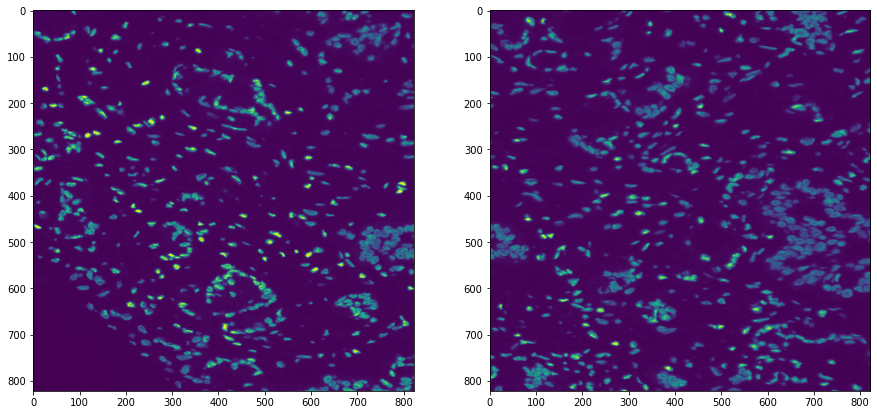

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
axes[0].imshow(marker1_1[0,...,0])
axes[1].imshow(marker1_2[0,...,0])

### Marker 1: PD-L1

Text(0.5, 1.0, 'Segmented (with DAPI nuclear marker)')

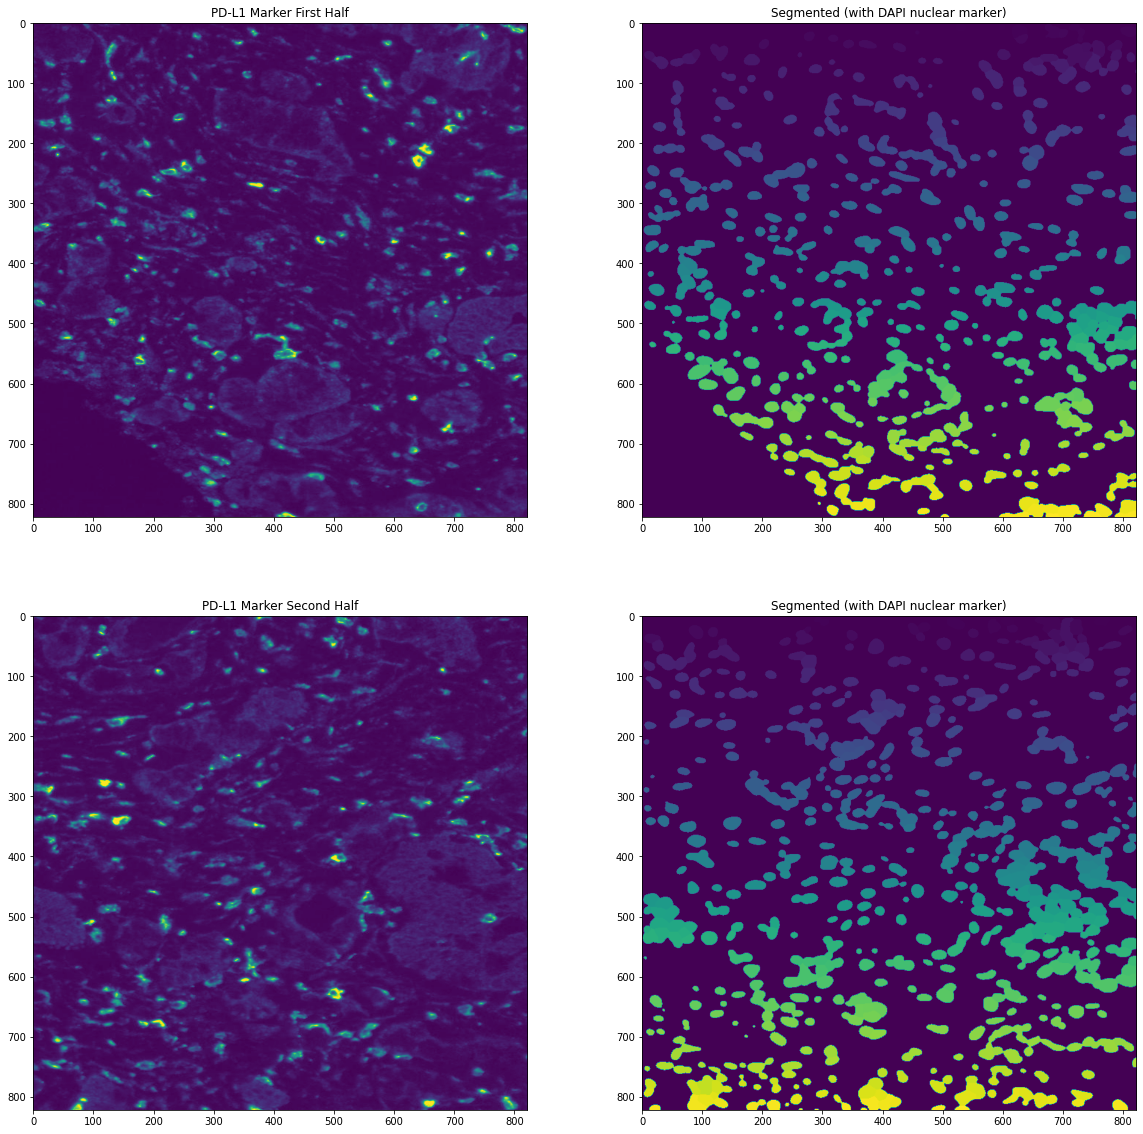

In [9]:
labeled_marker1_1 = app.predict(marker1_1, image_mpp=0.5)
labeled_marker1_2 = app.predict(marker1_2, image_mpp=0.5)
fig, ax = plt.subplots(2,2, figsize=(20, 20))
ax[0][0].imshow(marker1_1[0,...,1])
ax[0][0].set_title("PD-L1 Marker First Half")
ax[0][1].imshow(labeled_marker1_1[0,...,0])
ax[0][1].set_title("Segmented (with DAPI nuclear marker)")
ax[1][0].imshow(marker1_2[0,...,1])
ax[1][0].set_title("PD-L1 Marker Second Half")
ax[1][1].imshow(labeled_marker1_2[0,...,0])
ax[1][1].set_title("Segmented (with DAPI nuclear marker)")

### Marker 2: CD-8

True


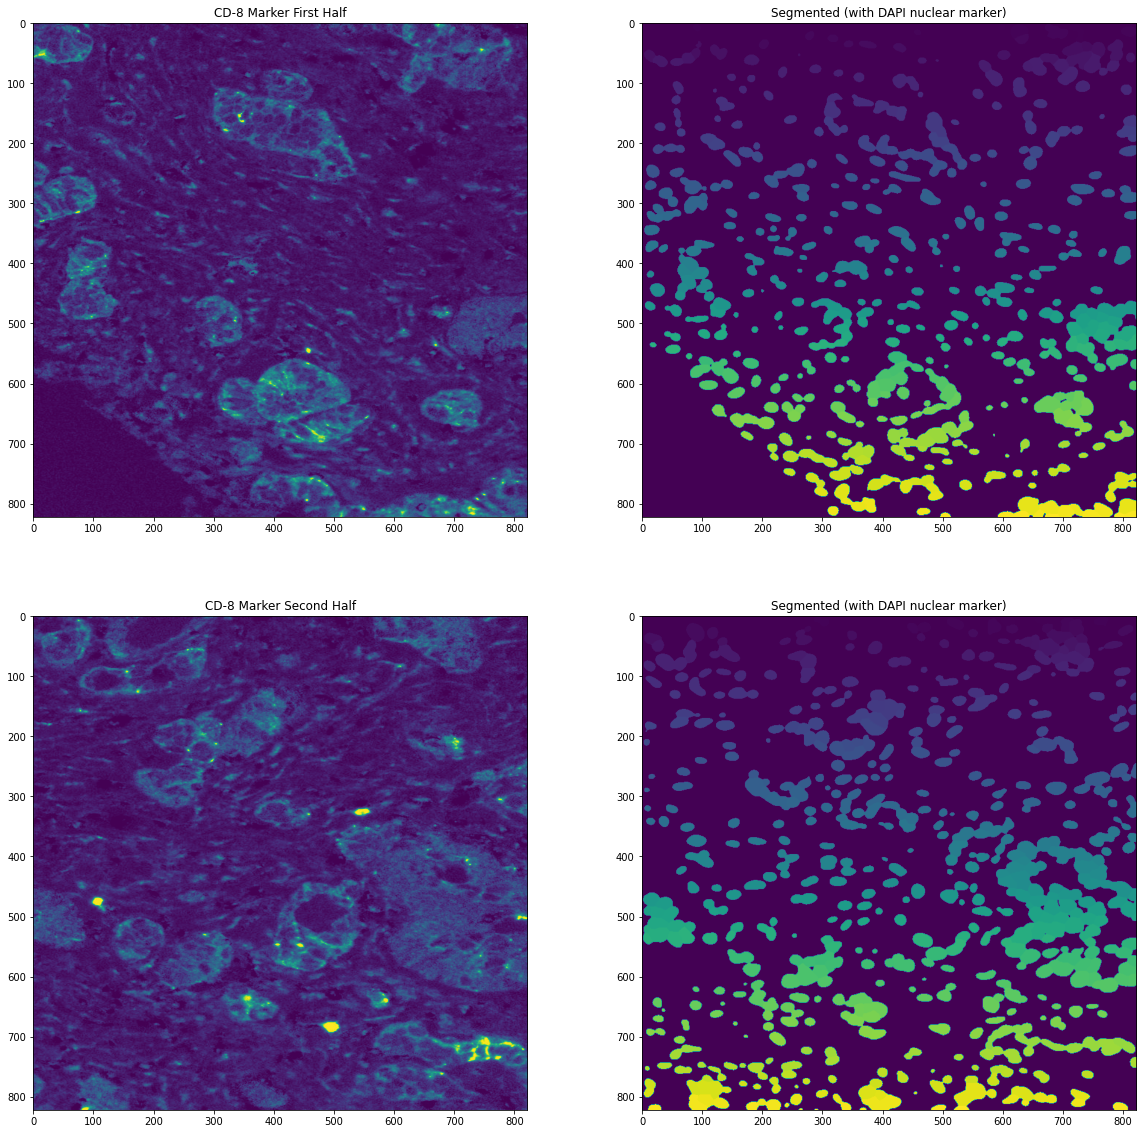

In [13]:
labeled_marker2_1 = app.predict(marker2_1, image_mpp=0.5)
labeled_marker2_2 = app.predict(marker2_2, image_mpp=0.5)
fig, ax = plt.subplots(2,2, figsize=(20, 20))
ax[0][0].imshow(marker2_1[0,...,1])
ax[0][0].set_title("CD-8 Marker First Half")
ax[0][1].imshow(labeled_marker2_1[0,...,0])
ax[0][1].set_title("Segmented (with DAPI nuclear marker)")
ax[1][0].imshow(marker2_2[0,...,1])
ax[1][0].set_title("CD-8 Marker Second Half")
ax[1][1].imshow(labeled_marker2_2[0,...,0])
ax[1][1].set_title("Segmented (with DAPI nuclear marker)")


### Marker 3: CK

Text(0.5, 1.0, 'Segmented (with DAPI nuclear marker)')

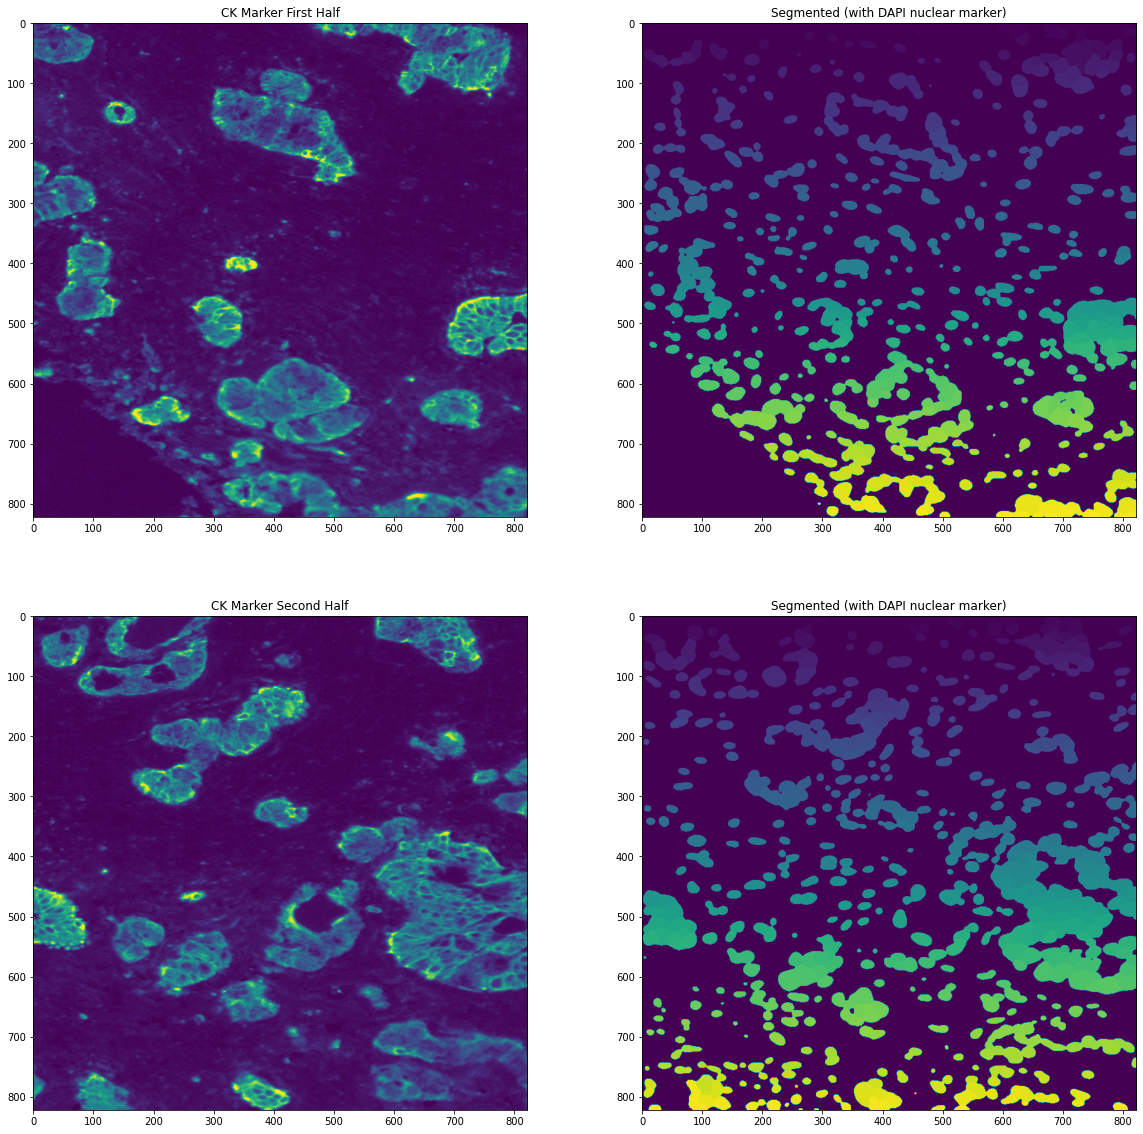

In [17]:
labeled_marker3_1 = app.predict(marker3_1, image_mpp=0.5)
labeled_marker3_2 = app.predict(marker3_2, image_mpp=0.5)
fig, ax = plt.subplots(2,2, figsize=(20, 20))
ax[0][0].imshow(marker3_1[0,...,1])
ax[0][0].set_title("CK Marker First Half")
ax[0][1].imshow(labeled_marker3_1[0,...,0])
ax[0][1].set_title("Segmented (with DAPI nuclear marker)")
ax[1][0].imshow(marker3_2[0,...,1])
ax[1][0].set_title("CK Marker Second Half")
ax[1][1].imshow(labeled_marker3_2[0,...,0])
ax[1][1].set_title("Segmented (with DAPI nuclear marker)")

In [19]:
a = (labeled_marker3_1 == labeled_marker1_1).all()
print(a)

False


## Centroids (with DAPI marker)

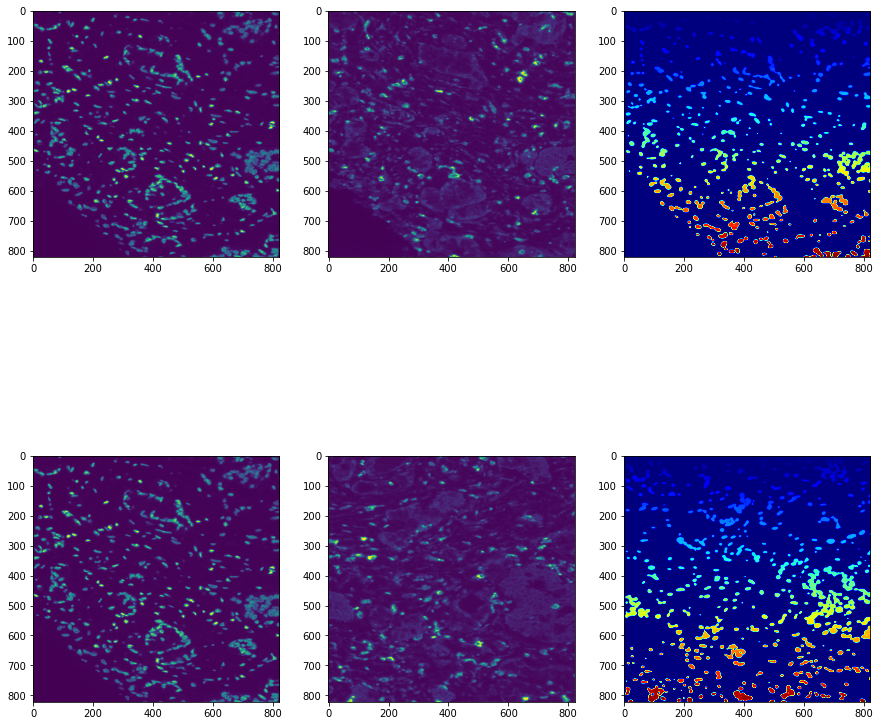

In [193]:
labeled_nuc_mark1_1 = app.predict(marker1_1, image_mpp=0.5, compartment = 'nuclear')
labeled_nuc_mark1_2 = app.predict(marker1_2, image_mpp=0.5, compartment = 'nuclear')
fig, ax = plt.subplots(2, 3, figsize=(15, 15))
ax[0][0].imshow(marker1_1[0, ..., 0])
ax[0][1].imshow(marker1_1[0, ..., 1])
ax[0][2].imshow(labeled_nuc_mark1_1[0, ..., 0], cmap = "jet")
ax[1][0].imshow(marker1_1[0, ..., 0])
ax[1][1].imshow(marker1_2[0, ..., 1])
ax[1][2].imshow(labeled_nuc_mark1_2[0, ..., 0], cmap = "jet")
plt.show()

In [194]:
import deepcell
from skimage.feature import peak_local_max

seed=0


In [195]:
X_test_nuc1 = marker1_1
y_test_nuc1 = labeled_nuc_mark1_1
X_test_nuc1 = X_test_nuc1[:,...,0]
X_test_nuc1 = X_test_nuc1[:,...,np.newaxis]

Text(0.5, 1.0, 'Foreground/Background')

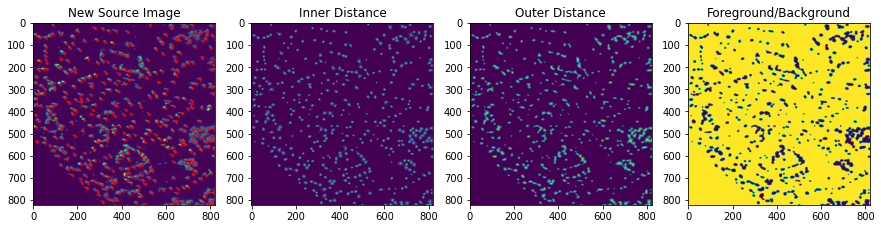

In [196]:
from deepcell import image_generators
from deepcell.utils import train_utils

transforms = ['centroid', 'outer-distance', 'fgbg']
transforms_kwargs = {'outer-distance': {'erosion_width': 0}}

batch_size = 1
min_objects = 1

# use augmentation for training but not validation
#datagen = image_generators.SemanticDataGenerator(
#    rotation_range=180,
#    shear_range=0,
#    zoom_range=(0.75, 1.25),
#    horizontal_flip=True,
#    vertical_flip=True)

datagen_val = image_generators.SemanticDataGenerator(
    rotation_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=0,
    vertical_flip=0)

val_data_new = datagen_val.flow(
    {'X': X_test_nuc1, 'y': y_test_nuc1},
    seed=seed,
    transforms=transforms,
    transforms_kwargs=transforms_kwargs,
    min_objects=min_objects,
    batch_size=batch_size)

inputs, outputs = val_data_new.next()

img = inputs[0]
inner_distance = outputs[0]
outer_distance = outputs[1]
fgbg = outputs[2]

coords1 = peak_local_max(
    inner_distance[0,...,0],
    min_distance=10,
    threshold_abs=0.1,
    exclude_border=False)

fig, axes = plt.subplots(1, 4, figsize=(15, 15))

axes[0].imshow(img[..., 0])
axes[0].set_title('New Source Image')
axes[0].scatter(coords1[..., 1], coords1[..., 0],
                color='r', marker='.', s=10)

axes[1].imshow(inner_distance[0, ..., 0])
axes[1].set_title('Inner Distance')

axes[2].imshow(outer_distance[0, ..., 0])
axes[2].set_title('Outer Distance')

axes[3].imshow(fgbg[0, ..., 0])
axes[3].set_title('Foreground/Background')

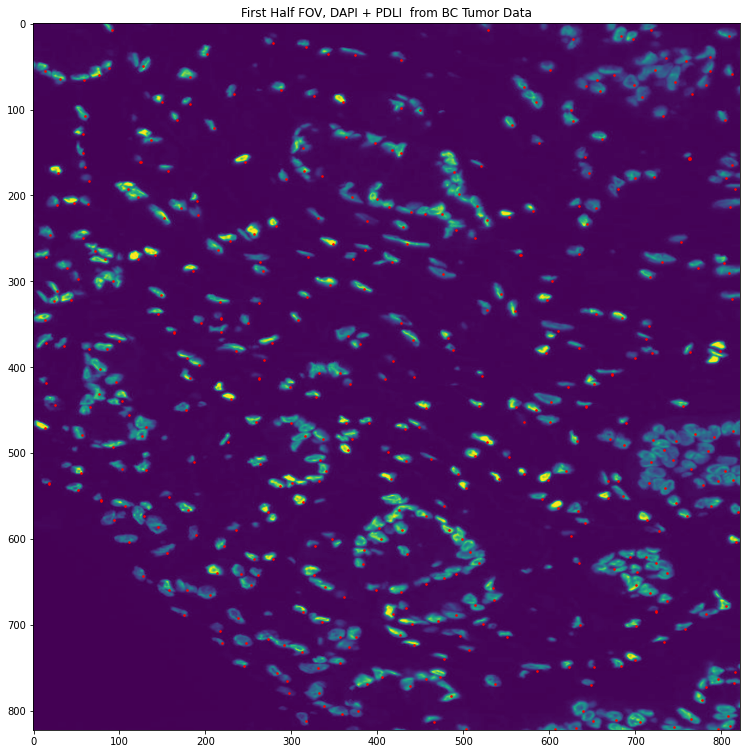

In [197]:
plt.figure(figsize=(13,13))
plt.imshow(img[..., 0])
plt.title('First Half FOV, DAPI + PDLI  from BC Tumor Data')
plt.scatter(coords1[..., 1], coords1[..., 0],
                color='r', marker='.', s=10)

In [198]:
X_test_nuc2 = marker1_2
y_test_nuc2 = labeled_nuc_mark1_2
X_test_nuc2 = X_test_nuc2[:,...,0]
X_test_nuc2 = X_test_nuc2[:,...,np.newaxis]

Text(0.5, 1.0, 'Foreground/Background')

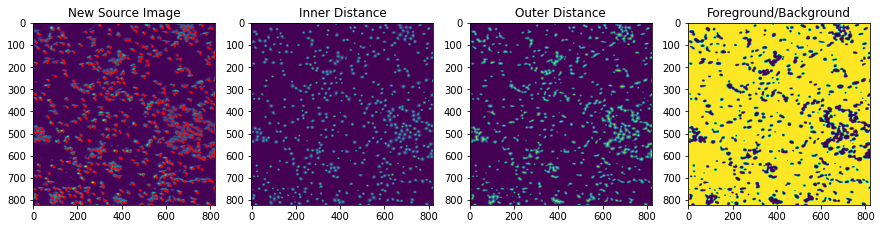

In [199]:
from deepcell import image_generators
from deepcell.utils import train_utils

transforms = ['centroid', 'outer-distance', 'fgbg']
transforms_kwargs = {'outer-distance': {'erosion_width': 0}}

batch_size = 1
min_objects = 1

# use augmentation for training but not validation
datagen = image_generators.SemanticDataGenerator(
    rotation_range=180,
    shear_range=0,
    zoom_range=(0.75, 1.25),
    horizontal_flip=True,
    vertical_flip=True)

datagen_val = image_generators.SemanticDataGenerator(
    rotation_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=0,
    vertical_flip=0)

val_data_new = datagen_val.flow(
    {'X': X_test_nuc2, 'y': y_test_nuc2},
    seed=seed,
    transforms=transforms,
    transforms_kwargs=transforms_kwargs,
    min_objects=min_objects,
    batch_size=batch_size)

inputs, outputs = val_data_new.next()

img = inputs[0]
inner_distance = outputs[0]
outer_distance = outputs[1]
fgbg = outputs[2]

coords2 = peak_local_max(
    inner_distance[0,...,0],
    min_distance=10,
    threshold_abs=0.1,
    exclude_border=False)


fig, axes = plt.subplots(1, 4, figsize=(15, 15))

axes[0].imshow(img[..., 0])
axes[0].set_title('New Source Image')
axes[0].scatter(coords2[..., 1], coords2[..., 0],
                color='r', marker='.', s=10)

axes[1].imshow(inner_distance[0, ..., 0])
axes[1].set_title('Inner Distance')

axes[2].imshow(outer_distance[0, ..., 0])
axes[2].set_title('Outer Distance')

axes[3].imshow(fgbg[0, ..., 0])
axes[3].set_title('Foreground/Background')

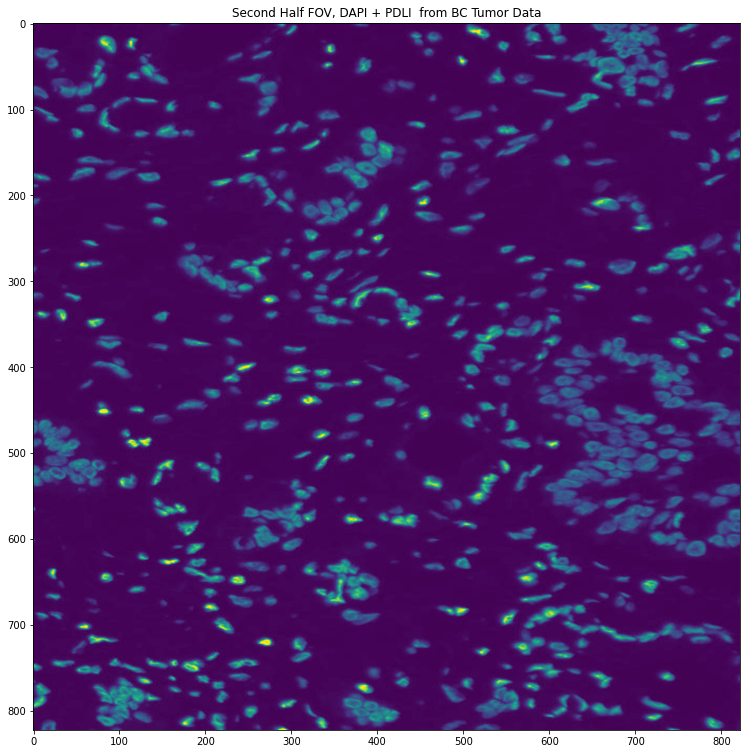

In [200]:
plt.figure(figsize=(13,13))
plt.imshow(img[..., 0])
plt.title('Second Half FOV, DAPI + PDLI  from BC Tumor Data')
plt.scatter(coords[..., 1], coords[..., 0],
                color='r', marker='.', s=10)

In [201]:
#check total cells counted as of now
print(len(coords1) + len(coords2))

983


Original unsplit FOV had 953 total centroids vs. 983 with split FOV image


### Readjusted Centroid Measurements and Rejoining Split Segmentation

In [202]:
r_nuc_im_1_1 = Image.fromarray(marker1_1[0, ..., 0])
r_labeled_nuc_im_1_1 = Image.fromarray(labeled_nuc_mark1_1[0, ..., 0])
r_nuc_im_1_2 = Image.fromarray(marker1_2[0, ..., 0])
r_labeled_nuc_im_1_2 = Image.fromarray(labeled_nuc_mark1_2[0, ..., 0])


r_nuc_im_1_1 = r_nuc_im_1_1.resize((width_cutoff, original_length))
r_labeled_nuc_im_1_1 = r_labeled_nuc_im_1_1.resize((width_cutoff, original_length))
r_nuc_im_1_2 = r_nuc_im_1_2.resize((width_cutoff, original_length))
r_labeled_nuc_im_1_2 = r_labeled_nuc_im_1_2.resize((width_cutoff, original_length))


r_nuc_im_1_1 = np.array(r_nuc_im_1_1)
r_labeled_nuc_im_1_1 = np.array(r_labeled_nuc_im_1_1)
r_nuc_im_1_2 = np.array(r_nuc_im_1_2)
r_labeled_nuc_im_1_2 = np.array(r_labeled_nuc_im_1_2)


In [203]:

length_factor = sqrWidth/r_labeled_nuc_im_1_1.shape[1]
width_factor = sqrWidth/r_labeled_nuc_im_1_1.shape[0]

coords1[..., 1] =np.dot(coords1[...,1], width_factor)
coords1[...,0] = np.dot(coords1[...,0], length_factor)
coords2[...,1] = np.dot(coords2[...,1], width_factor)
coords2[...,0] = np.dot(coords2[...,0], length_factor)


#Add width_cutoff to left side of coords
coords2[...,1] = coords2[...,1] + width_cutoff

#coords_0 = list(coords1[...,0]).append(list(coords2[...,0]))
#coords_1 = list(coords1[...,1]).append(list(coords2[...,1]))

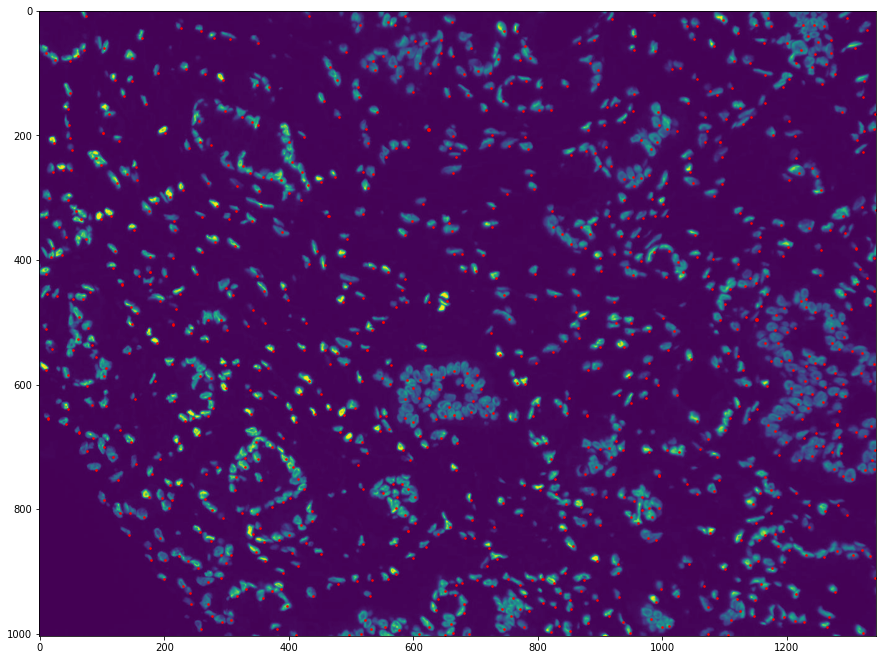

In [205]:
r_nuc_im_1 = np.concatenate((r_nuc_im_1_1,r_nuc_im_1_2),axis=1)
plt.figure(figsize=(15,15))
plt.imshow(r_nuc_im_1)
plt.scatter(coords2[..., 1], coords2[..., 0],
                color='r', marker='.', s=10)
plt.scatter(coords1[..., 1], coords1[..., 0],
                color='r', marker='.', s=10)


### Conclusion: The split FOV does not improve segmentation based off visual inspection and comparasion to the non-split method. Additionally it counts certain cells twice. To improve segmentation, retraining a model with manually labeled cells could lead to better results